In [1]:
# get hazard object
import numpy as np
from climada.hazard import Hazard, Centroids
from climada.test import get_test_file

haz_tc_fl = Hazard.from_hdf5(
    get_test_file("HAZ_DEMO_FL_15")
) 
haz_tc_fl.check()

In [2]:
# compute local exceedance instensity
test_return_periods = np.arange(2, 200, 5)
local_exceedance_intensity, _, _ = haz_tc_fl.local_exceedance_intensity(
    return_periods=test_return_periods, method="extrapolate"
)

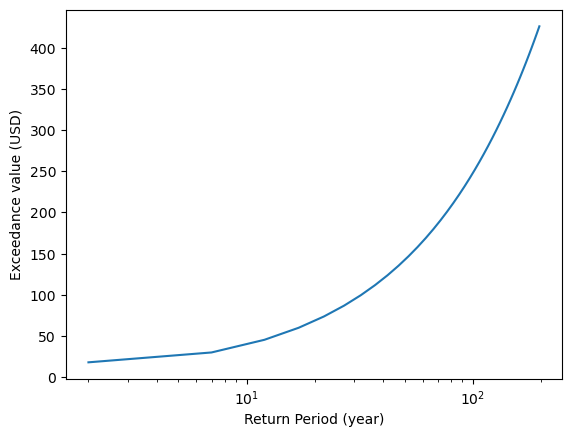

In [3]:
from return_period_maps import ReturnPeriodMap, ExceedanceCurve
rp_map = ReturnPeriodMap.from_CLIMADA_local_exceedance_intensity(local_exceedance_intensity)
rp_map.exceedance_curves[0].plot_exceedance_instensity_curve()

In [4]:
rp_map.exceedance_curves[0].exceedance_frequencies[::-1]

array([0.00507614, 0.00520833, 0.00534759, 0.00549451, 0.00564972,
       0.00581395, 0.00598802, 0.00617284, 0.00636943, 0.00657895,
       0.00680272, 0.00704225, 0.00729927, 0.00757576, 0.00787402,
       0.00819672, 0.00854701, 0.00892857, 0.00934579, 0.00980392,
       0.01030928, 0.01086957, 0.01149425, 0.01219512, 0.01298701,
       0.01388889, 0.01492537, 0.01612903, 0.01754386, 0.01923077,
       0.0212766 , 0.02380952, 0.02702703, 0.03125   , 0.03703704,
       0.04545455, 0.05882353, 0.08333333, 0.14285714, 0.5       ])

In [5]:
from convert_resolution import combine_exceedance_curves
agg_rp_curve = combine_exceedance_curves(
    rp_map.exceedance_curves[:2],
    value_resolution=10.,
    aggregation_method=sum)

[[1.16428571e+01 3.57142857e-01 5.95238095e-02 2.45098039e-02
  1.33689840e-02 8.41750842e-03 5.78703704e-03 4.22297297e-03
  3.21750322e-03 2.53292806e-03 2.04582651e-03 1.68690958e-03
  1.41482739e-03 1.20365912e-03 1.03648425e-03 9.01875902e-04
  7.91891036e-04 7.00869078e-04 6.24687656e-04 5.60286867e-04
  5.05356782e-04 4.58127176e-04 4.17222964e-04 3.81562882e-04
  3.50287236e-04 3.22705563e-04 2.98258172e-04 2.76487503e-04
  2.57016552e-04 2.39532433e-04 2.23773720e-04 2.09520617e-04
  1.96587245e-04 1.84815554e-04 1.74070464e-04 1.64235974e-04
  1.55212020e-04 1.46911912e-04 1.39260250e-04 1.32191201e-04
  5.07614213e-03]
 [1.16428571e+01 3.57142857e-01 5.95238095e-02 2.45098039e-02
  1.33689840e-02 8.41750842e-03 5.78703704e-03 4.22297297e-03
  3.21750322e-03 2.53292806e-03 2.04582651e-03 1.68690958e-03
  1.41482739e-03 1.20365912e-03 1.03648425e-03 9.01875902e-04
  7.91891036e-04 7.00869078e-04 6.24687656e-04 5.60286867e-04
  5.05356782e-04 4.58127176e-04 4.17222964e-04 3.815

In [6]:
agg_rp_curve.values

array([ 17.92227763,  27.92227763,  37.92227763,  47.92227763,
        57.92227763,  67.92227763,  77.92227763,  87.92227763,
        97.92227763, 107.92227763, 117.92227763, 127.92227763,
       137.92227763, 147.92227763, 157.92227763, 167.92227763,
       177.92227763, 187.92227763, 197.92227763, 207.92227763,
       217.92227763, 227.92227763, 237.92227763, 247.92227763,
       257.92227763, 267.92227763, 277.92227763, 287.92227763,
       297.92227763, 307.92227763, 317.92227763, 327.92227763,
       337.92227763, 347.92227763, 357.92227763, 367.92227763,
       377.92227763, 387.92227763, 397.92227763, 407.92227763,
       417.92227763, 427.92227763, 437.92227763, 447.92227763,
       457.92227763, 467.92227763, 477.92227763, 487.92227763,
       497.92227763, 507.92227763, 517.92227763, 527.92227763,
       537.92227763, 547.92227763, 557.92227763, 567.92227763,
       577.92227763, 587.92227763, 597.92227763, 607.92227763,
       617.92227763, 627.92227763])

In [7]:
1/agg_rp_curve.exceedance_frequencies

array([8.13840830e-02, 3.35520685e+00, 5.47826087e+00, 5.81698269e+00,
       9.27337897e+00, 1.15737771e+01, 1.26693561e+01, 1.59778320e+01,
       1.91390758e+01, 2.24394470e+01, 2.57581908e+01, 2.76177310e+01,
       3.09077026e+01, 3.46144277e+01, 3.83517959e+01, 4.21139701e+01,
       4.62606432e+01, 4.99966027e+01, 5.41186181e+01, 7.86714767e+01,
       8.35788967e+01, 8.95803828e+01, 9.47167125e+01, 9.96503549e+01,
       1.04692090e+02, 1.09690808e+02, 1.14628987e+02, 1.19614204e+02,
       1.24587117e+02, 1.29553616e+02, 1.34514681e+02, 1.39453521e+02,
       1.44413055e+02, 1.49369681e+02, 1.54324082e+02, 1.59276738e+02,
       1.64227993e+02, 1.73865195e+02, 1.78816235e+02, 1.83931547e+02,
       1.88909348e+02, 1.93857277e+02, 4.41722563e+03, 4.54145825e+03,
       1.49183351e+04, 2.46984289e+04, 2.54804567e+04, 4.45052142e+04,
       5.46417077e+04, 6.51858129e+04, 8.47016097e+04, 1.04705721e+05,
       1.25380310e+05, 1.46899617e+05, 1.78219093e+05, 2.01849093e+05,
      

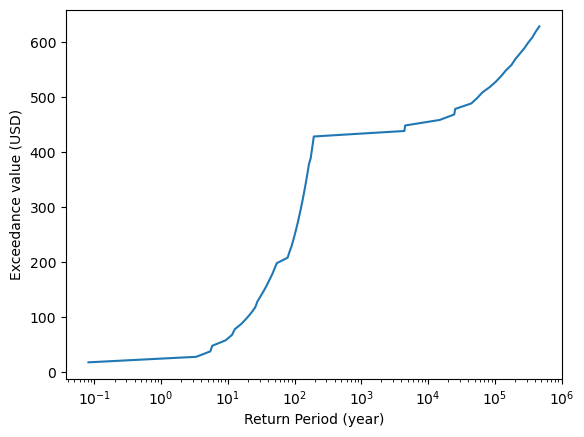

In [8]:
agg_rp_curve.plot_exceedance_instensity_curve()
